# **Data Overview:**
## This data file is a Comma separated value file format with 2290 rows and 7 columns. It contains 5 columns which are numerical in datatype and one column in Date format. Clearly the data shows value of the variables SPX,GLD,USO,SLV,EUR/USD against the dates in the date column.

In [1]:
#importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Data Collection and Preprocessing

In [2]:
#loading the csv data to a pandas DataFrame
gold_data=pd.read_csv('/content/gld_price_data.csv')


In [3]:
#load first 5 rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
#last 5 rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
#shape of the dataset
gold_data.shape

(2290, 6)

In [6]:
#basic information about the dataset
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
#checking for missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
#getting statistical measure of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## Correlation:
1.Postive correlation: one increases depends on increase of others

2.negative correlation: one increase depends on decrease of others

In [9]:
correlation=gold_data.corr()

<ipython-input-9-a848558ce65b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=gold_data.corr()


<Axes: >

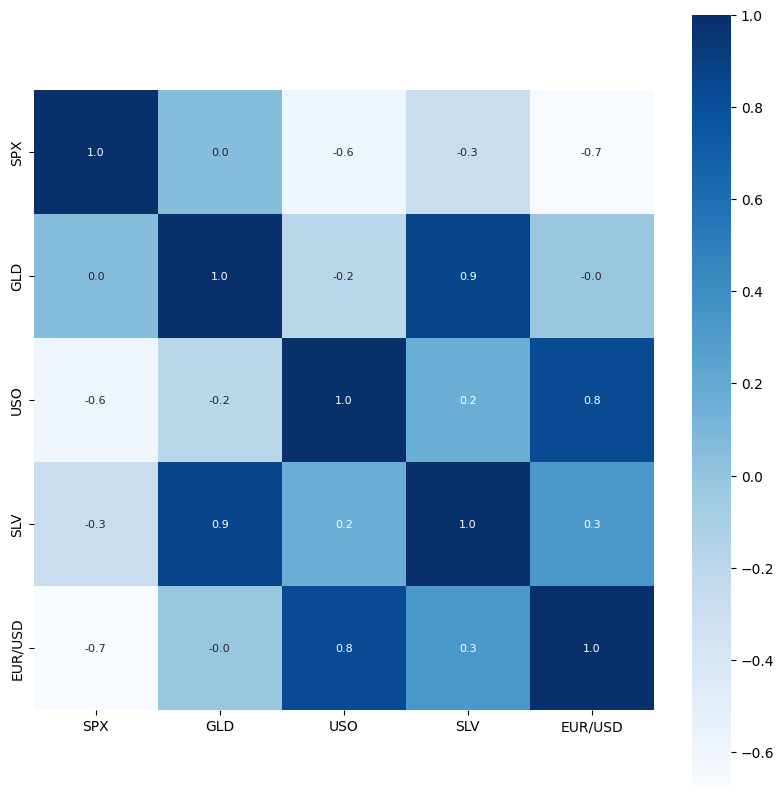

In [12]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [13]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-14-1814860eee27>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

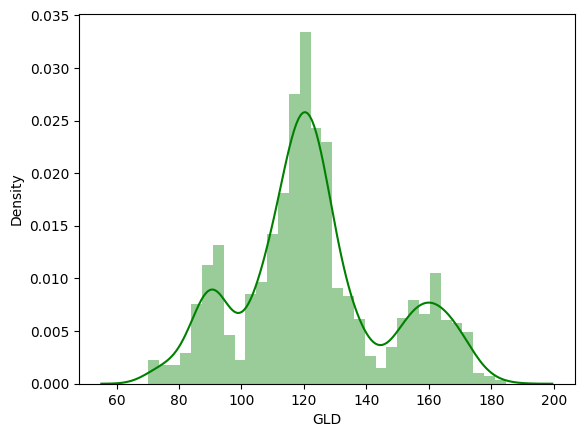

In [14]:
#checking the distribution of the GLD prices
sns.distplot(gold_data['GLD'],color='green')

## splitting features and target

In [15]:
x=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']

In [16]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [17]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


## splitting training and testing data

In [21]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=2)

### Model Training: Random Forest Regressor

In [22]:
regressor=RandomForestRegressor(n_estimators=100)

In [23]:
#training the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

### Model Evaluation

In [24]:
#predictions on test data
test_data_pred=regressor.predict(x_test)
print(test_data_pred)

[168.43309907  82.28489968 116.1479005  127.45580072 120.72660152
 154.86759716 150.18769849 126.22780014 117.58319864 125.94010108
 116.85270048 171.93470091 141.49309791 167.79359815 115.15859996
 117.80840027 138.46030367 170.02090107 159.06950312 157.8718993
 155.18700023 125.48140032 175.77319988 157.23850345 125.1662001
  93.69449966  77.77019972 120.63099991 119.12359962 167.50140012
  88.03300052 125.27410082  91.15850079 117.66020042 121.09549969
 136.76810034 115.51600147 115.25020083 146.86719936 106.93040115
 104.53070241  87.24179793 126.44260076 118.1928999  154.95109946
 119.78090005 108.48829979 108.00479819  93.12500018 127.09209765
  75.11230046 113.69119959 121.3090001  110.87859931 118.90109873
 121.09539919 158.28189963 167.72440093 147.01969677  85.99399873
  94.07080034  86.86169866  90.56500038 118.97520073 126.51990018
 127.49650029 169.89090003 122.26519904 117.42459876  98.51350053
 168.22140079 143.49549812 132.30130281 121.1703023  121.00619983
 119.7157005

In [26]:
# r squared error
error_score=metrics.r2_score(y_test,test_data_pred)
print('R Squared Error',error_score)

R Squared Error 0.9889608553690917


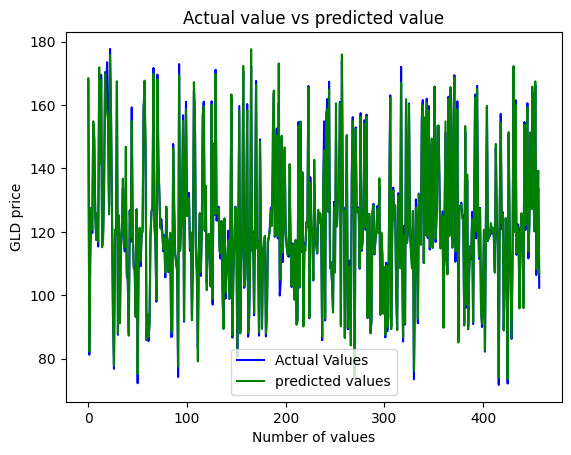

In [30]:
#comparison between Actual value and predicted value
y_test=list(y_test)
plt.plot(y_test,color='blue',label='Actual Values')
plt.plot(test_data_pred,color='green',label='predicted values')
plt.title('Actual value vs predicted value')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()